# Computer Vision. Images as Tensors

Computer Vision (CV) is a field that studies how computers can gain some degree of understanding from digital images and/or video. *Understanding* in this definition has a rather broad meaning - it can range from being able to distinguish between a cat and a dog on the picture, to more complex tasks such as describing the image in natural language.

The most common problems of computer vision include:

* **Image Classification** is the simplest task, when we need to classify an image into one of many pre-defined categories, for example, distinguish a cat from a dog on a photograph, or recognize a handwritten digit.

* **Object Detection** is a bit more difficult task, in which we need to find known objects on the picture and localize them, that is, return the **bounding box** for each of recognized objects.

* **Segmentation** is similar to object detection, but instead of giving bounding box we need to return an exact pixel map outlining each of the recognized objects.  

![An image showing how computer vision object detection can be performed with cats, dogs, and ducks.](images/2-image-data-1.png)

Image taken from [CS224d Stanford Course](https://cs224d.stanford.edu/index.html)

We’ll focus on **image classification** task, and how neural networks can be used to solve it. As with any other machine learning tasks, to train a model for classifying images we’ll need a labeled dataset, that is, a large number of images for each of the classes. 


## Images as Tensors

Computer Vision works with Images. As you probably know, images consist of pixels, so they can be thought of as a rectangular collection (array) of pixels.

In the first part of this tutorial, we will deal with handwritten digit recognition. We will use the MNIST dataset, which consists of grayscale images of handwritten digits, 28x28 pixels. Each image can be represented as 28x28 array, and elements of this array would denote intensity of corresponding pixel - either in the scale of range 0 to 1 (in which case floating point numbers are used), or 0 to 255 (integers). A popular python library called `numpy` is often used with computer vision tasks, because it allows to operate with multidimensional arrays effectively.

To deal with color images, we need some way to represent colors. In most cases, we represent each pixel by 3 intensity values, corresponding to Red (R), Green (G) and Blue (B) components. This color encoding is called RGB, and thus color image of size $W\times H$ will be represented as an array of size $3\times H\times W$ (sometimes the order of components might be different, but the idea is the same).

![Grayscale Image](images/2-image-data-2.png) | ![RGB Image](images/2-image-data-3.png)
------|------
5x5 Grayscale Image | 5x5 Color (RGB) Image

Using multi-dimensional arrays to represent images also has an advantage, because we can use an extra dimension to store a sequence of images. For example, to represent a video fragment consisting of 200 frames with 800x600 dimension, we may use the tensor of size 200x3x600x800.

Multi-dimensional arrays are also called **tensors**. Usually, we refer to tensors when we speak about some neural network framework, such as PyTorch. The main difference between tensors in PyTorch and numpy arrays is that tensors support parallel operations on GPU, if it is available. Also, PyTorch offers additional functionality, such as automatic differentiation, when operating on tensors.  

## Import packages and load the MNIST Dataset

In [ ]:
!pip install -r https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/requirements.txt

In [1]:
#Import the packages needed.
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

PyTorch has a [number of datasets](https://pytorch.org/vision/stable/datasets.html) available right from the library. Here we are using the well-known [MNIST](http://yann.lecun.com/exdb/mnist/) dataset of handwritten digits, available through `torchvison.datasets.MNIST` in PyTorch. The dataset object returns the data in the form of Python Imagine Library (PIL) images, which we convert to tensors by passing a `transform=ToTensor()` parameter. 

When using your own notebooks, you can also experiment with the other built in datasets, in particular [FashionMNIST](https://pytorch.org/vision/stable/datasets.html#fashion-mnist).

In [7]:
from torchvision.transforms import ToTensor

data_train = torchvision.datasets.MNIST('./data',
        download=True,train=True,transform=ToTensor())
data_test = torchvision.datasets.MNIST('./data',
        download=True,train=False,transform=ToTensor())

## Visualizing the dataset
Now that we have downloaded the dataset we can visualize some of the digits

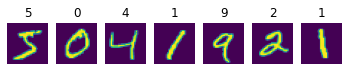

In [8]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

## Dataset structure

We have a total of 6000 training images and 1000 testing images. Its important to split out the data for training and testing. We also want to do some data exploration to get a better idea of what our data looks like

Each sample is a tuple in the following structure:
 * First element is the actual image of a digit, represented by a tensor of shape 1x28x28
 * Second element is a **label** that specifies which digit is represented by the tensor. It is a tensor that contains a number from 0 to 9.

`data_train` is a training dataset that we will use to train our model on. `data_test` is a smaller test dataset that we can use to verify our model. 

In [9]:
print('Training samples:',len(data_train))
print('Test samples:',len(data_test))

print('Tensor size:',data_train[0][0].size())
print('First 10 digits are:', [data_train[i][1] for i in range(10)])

Training samples: 60000
Test samples: 10000
Tensor size: torch.Size([1, 28, 28])
First 10 digits are: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


All pixel intensities of the images are represented by floating-point values in between 0 and 1:

In [10]:
print('Min intensity value: ',data_train[0][0].min().item())
print('Max intensity value: ',data_train[0][0].max().item())

Min intensity value:  0.0
Max intensity value:  1.0


## Loading your own images

In most of the practical applications, you would have your own images located on disk that you want to use to train your neural network. In this case, you need to load them into PyTorch tensors. 

One of the ways to do that is to use one of the Python libraries for image manipulation, such as *Open CV*, or *PIL/Pillow*, or *imageio*. Once you load your image into numpy array, you can easily convert it to tensors. 

> It is important to make sure that all values are scaled to the range [0..1] before you pass them to a neural network - it is the usual convention for data preparation, and all default weight initializations in neural networks are designed to work with this range. `ToTensor` transform that we have seen above automatically scales PIL/numpy images with integer pixel values into [0..1] range.

Even better approach is to use functionality in **Torchvision** library, namely `ImageFolder`. It does all the preprocessing steps automatically, and also assigns labels to images according to the directory structure. We will see the example of using `ImageFolder` later in this course, once we start classifying our own cats and dogs images.

> It is important to note that all images should be scaled to the same size. If your original images have different aspect ratios, you need to decide how to handle this scaling - either by cropping images, or by padding extra space.

## Takeaway

Neural networks work with tensors, and before training any models we need to convert our dataset into a set of tensors. This will often require rWe have loaded training and test datasets, and we are ready to start training our first neural network!